<h1 align="center">Ecuación de Poisson Boltzmann</h1>
<div align="right">Por David A. Miranda, PhD<br>2021</div>
<h2>1. Importa las librerias</h2>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.constants as cte
from scipy.integrate import odeint

## 2. Ecuación de Poisson-Boltzmann
La ecuación de Poisson se puede utilizar para estudiar las propiedades eléctricas de cargas eléctricas suspendidas en solución.  En tal caso, la densidad de cargas eléctricas en suspensión se puede modelar con una distribución de Maxwell-Botlzmann.  La ecuación de Poisson obtenida al considerar cargas positivas y negativas que obedecen una distribución de Maxwell-Boltzmn se conoce como ecución de Poisson-Boltzmann [(Grinmes and Martinsen, 2018, pp 30-33)](https://bibliotecavirtual.uis.edu.co:2191/science/article/pii/B9780123740045000027/pdfft):

$$\nabla^2\phi = \frac{2zq_e \eta_0}{\epsilon} sinh \left( \frac{zq_e}{k_BT} \phi \right)$$

En términos de la longitud de Debye $1/\kappa$ y se hace un cambio de variable $\psi = \dfrac{zq_e}{k_BT} \phi$, la ecuación de Poisson-Boltzmann toma la siguiente forma:

$$\nabla^2\psi = \kappa^2 sinh \left( \psi \right)\qquad(1)$$

Donde, $\kappa = \left( \dfrac{2z^2q_e^2 \eta_0}{\varepsilon k_BT} \right)^{1/2}$




In [2]:
q_e = cte.e                       # Carga del electrón
z   = 1                           # Valencia
n0  = 0.1                          # Concentración en mol/litro
eps = 80.5 * cte.epsilon_0        # Permitividad eléctrica del agua por la del vacío
kT = cte.Boltzmann * (20 + 273.15) # Constante de Boltzmann por la temperatura
kappa = np.sqrt(( 2 * (z**2) * n0 * (q_e**2) ) / (eps*kT))    

## 2.1. Solución analítica para una dimensión, 1D
La solución analítica de la ecuación (1) para el caso unidimensional está dada por:

$$ \psi(x) = 4 tanh^{-1} \left( \gamma e^{-\kappa x} \right)$$

Donde $\gamma = tanh\left( \frac{zq_e\psi_0}{4k_BT} \right)$.

Ver más detalles en [(Ohshima 2013, pp. 345)](https://link.springer.com/referenceworkentry/10.1007/978-3-642-20665-8_15).

In [3]:
phi_0 = 0.2 # V
x = np.linspace(1e-9, 5000, 1000)
def poisson_boltzmann_1D(x, n0, phi_0, T):
    kT = cte.Boltzmann * (T + 273.15)
    gamma = np.tanh(z * q_e * phi_0 / (4*kT))
    kappa = np.sqrt(( 2 * (z**2) * n0 * (q_e**2) ) / (eps*kT)) 
    return 4*np.arctanh(gamma * np.exp(-kappa * x))

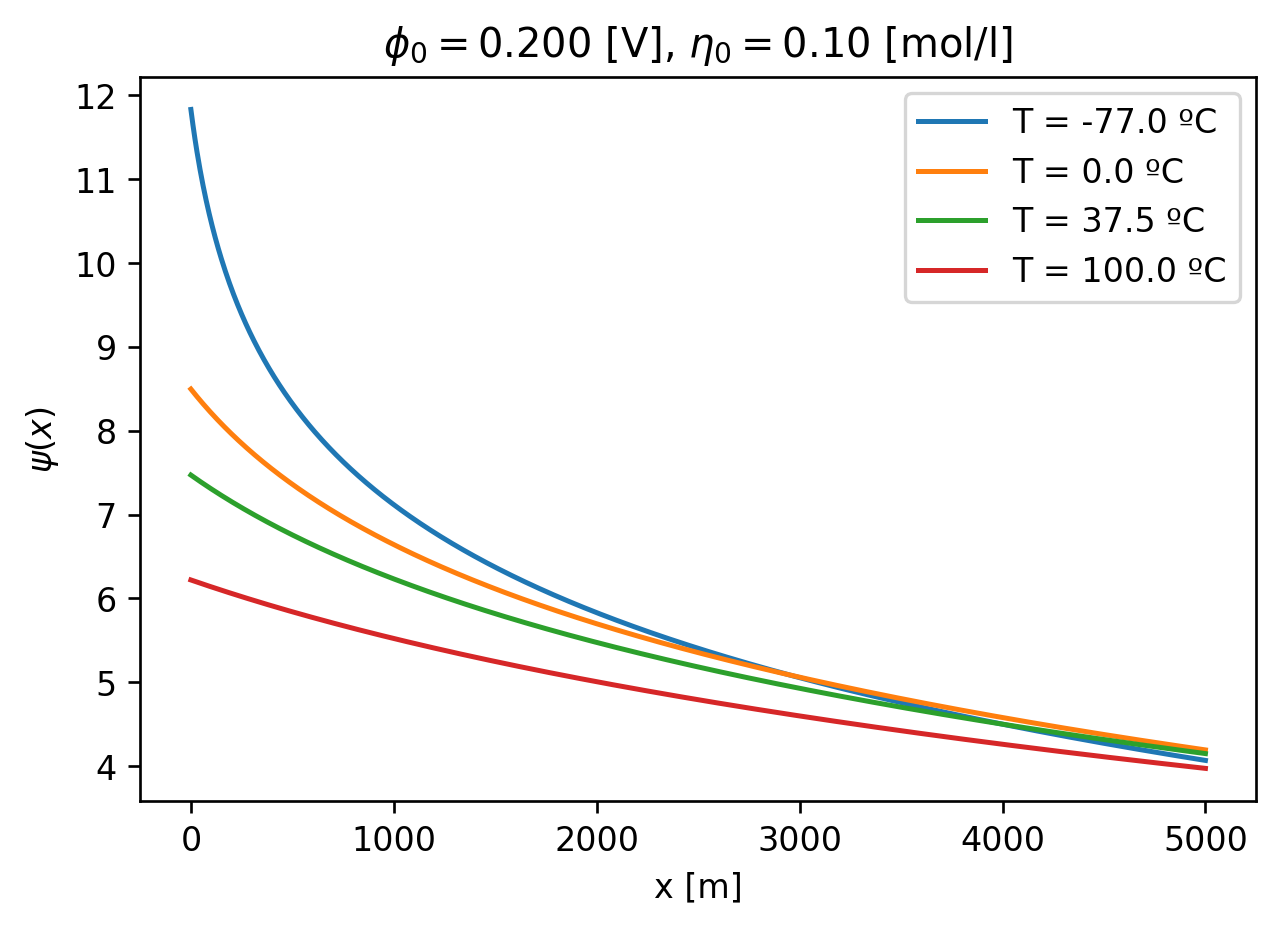

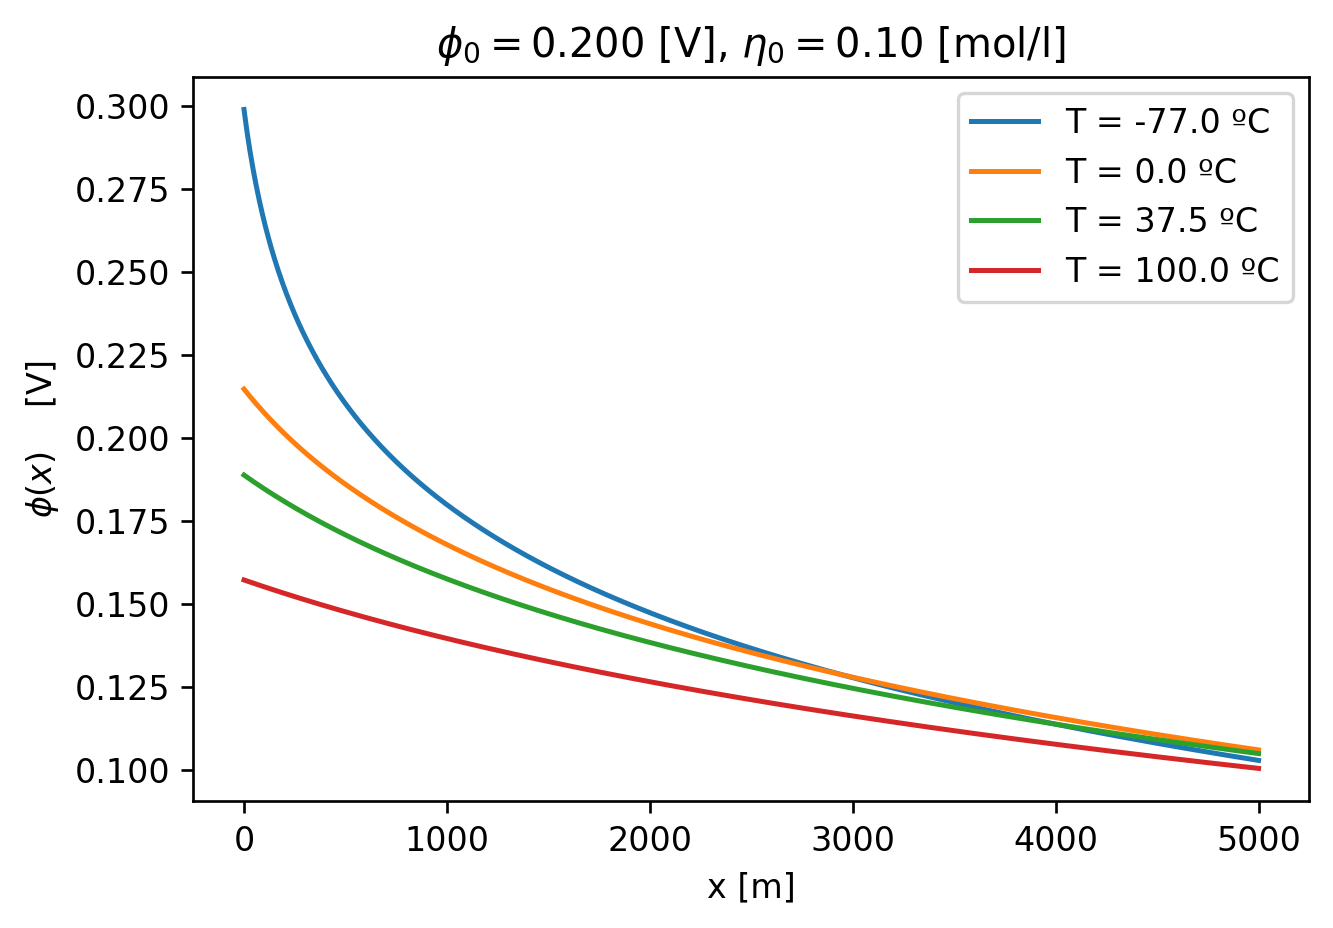

In [4]:
plt.figure(1, dpi=240)
plt.figure(2, dpi=240)

for T in [-77, 0, 37.5, 100]:
    psi_pb = poisson_boltzmann_1D(x, n0, phi_0, T)

    plt.figure(1)
    plt.plot(x, psi_pb, label='T = %0.1f ºC' % T)
    plt.xlabel('x [m]')
    plt.ylabel(r'$\psi(x)$')

    plt.figure(2)
    plt.plot(x, kT*psi_pb/(z*q_e), label='T = %0.1f ºC' % T)
    plt.xlabel('x [m]')
    plt.ylabel(r'$\phi(x)$    [V]')

title = r'$\phi_0 = %0.3f$ [V], $\eta_0 = %0.2f$ [mol/l]' % (phi_0, n0)
for fig in [1, 2]:
    plt.figure(fig)
    plt.title(title)
    _ = plt.legend()

## 2.2. Ecuación diferencial de segundo orden como sistema de ecuaciones diferenciales de primer orden
Para resolver la ecuación (1) numéricamente se puede utilizar el método odeint implementado en scipy.  Este método permite resolver sistemas de ecuaciones diferenciales de primer orden.  En tal sentido, el primer paso es transformar la ecuación (1) en un sistema de ecuaciones de primer orden; para ello se define $\vec{\xi}$, entonces, la ecuación (1) se transforma en:

$$\vec{\nabla} \cdot \vec{\xi} = \kappa^2 sinh(\psi)$$
$$\vec{\xi} = \vec{\nabla} \psi$$

### 2.2.1. El caso unidimensional, 1D
Para el caso en 1D, el anterior sistema de ecuaciones se escribe de la siguiente forma:
$$\frac{d \xi(x)}{dx} = \kappa^2 sinh[\psi(x)]$$
$$\xi(x) = \frac{d\psi(x)}{dx}$$

In [5]:
def dXi_dx(U, x, kappa=kappa):
    # U es un arreglo tal que ѱ = U[0] y ξ = U[1]
    # Esta función retorna las primeras derivadas [ѱ', ξ']
    psi = U[0]
    xi  = U[1]
    dxi_dx  = kappa**2 * np.sinh(psi)
    dpsi_dx = xi
    return [ dpsi_dx, dxi_dx ]

## 3. Preguntas de autoexplicación
+ Interprete la gráfica obtenida a partir de la solución analítica para 1D.
+ Para una misma concentración y temperatura, ¿cuál es el efecto de variar el potencial en el electrodo?
+ Para un mismo potencial en electrodo y temperatura, ¿cuál es el efecto de variar la concentración?
+ Para un mismo potencial y concentración, ¿cuál es el efecto de variar la temperatura?

End!